In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_mavg = pd.read_csv("C:\\Users\\rtc84\\OneDrive - Cornell University\\Research_FirstAuthor\\IceSlabCrevasses\\Revision\\FigurePlots\\StrainComparison_MAvg.csv")
df_ilavg = pd.read_csv("C:\\Users\\rtc84\\OneDrive - Cornell University\\Research_FirstAuthor\\IceSlabCrevasses\\Revision\\FigurePlots\\StrainComparison_ILAvg.csv")


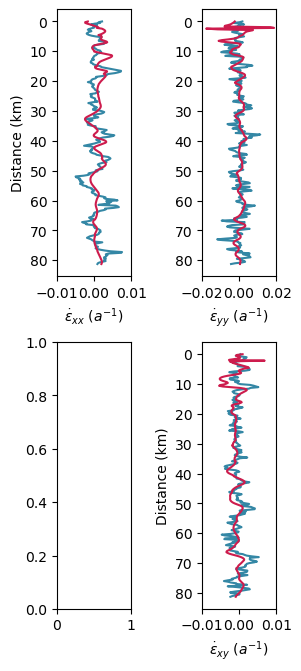

In [29]:
plt.close("all")
fig, ax = plt.subplots(2, 2, layout="constrained", figsize=(2.9,6.6))

ax[0,0].plot(df_mavg.e_xx, df_mavg.dist/1000, color="#3487A5")
ax[0,0].plot(df_ilavg.e_xx, df_ilavg.dist/1000, color="#CD1C4D")
ax[0,0].yaxis.set_inverted(True)
ax[0,0].set_xlim((-0.01, 0.01))
ax[0,0].set_xlabel("$\dot{\epsilon}_{xx}$ $(a^{-1})$")
ax[0,0].set_ylabel("Distance (km)")

ax[0,1].plot(df_mavg.e_yy, df_mavg.dist/1000, color="#3487A5")
ax[0,1].plot(df_ilavg.e_yy, df_ilavg.dist/1000, color="#CD1C4D")
ax[0,1].yaxis.set_inverted(True)
ax[0,1].set_xlim((-0.02, 0.02))
ax[0,1].set_xlabel("$\dot{\epsilon}_{yy}$ $(a^{-1})$")

ax[1,1].plot(df_mavg.e_xy, df_mavg.dist/1000, color="#3487A5")
ax[1,1].plot(df_ilavg.e_xy, df_ilavg.dist/1000, color="#CD1C4D")
ax[1,1].yaxis.set_inverted(True)
ax[1,1].set_xlim((-0.01, 0.01))
ax[1,1].set_xlabel("$\dot{\epsilon}_{xy}$ $(a^{-1})$")
ax[1,1].set_ylabel("Distance (km)")

plt.savefig("C:\\Users\\rtc84\\OneDrive - Cornell University\\Research_FirstAuthor\\IceSlabCrevasses\\Revision\\RevisedFigures\\StrainComp.svg")
plt.show()

In [6]:
# Directory with ice slab outline
ice_dir = "C:\\Users\\rtc84\\OneDrive - Cornell University\\Research_FirstAuthor\\IceSlabCrevasses\\FinalModel\\"

# Load ice slab file
dataset = rio.open(ice_dir+"IceSlabMask.tif")
ice_slabs = dataset.read(1)
dataset.close()
ice_slabs[2752:,2428:] = 0

dataset = rio.open("FractureProbability_DualsMaps2.tif")
probability = dataset.read(1)
dataset.close()
probability[2752:,2428:] = 0

slabs = np.matrix.flatten(ice_slabs)
fracs = np.matrix.flatten(probability)
    
slab_area = np.size(slabs[slabs == 1])
frac_area = np.size(fracs[np.logical_and(np.logical_and(fracs > 0, fracs < 1),slabs == 1)])
print(1 - frac_area/slab_area)

0.7046960379414844


In [6]:
# Directory with ice slab outline
ice_dir = "C:\\Users\\rtc84\\OneDrive - Cornell University\\Research_FirstAuthor\\IceSlabCrevasses\\FinalModel\\"

# Load ice slab file
dataset = rio.open(ice_dir+"IceSlabMask.tif")
ice_slabs = dataset.read(1)
dataset.close()
ice_slabs[2752:,2428:] = 0

dataset = rio.open("FractureProbability_DualsMaps2.tif")
probability = dataset.read(1)
dataset.close()
probability[2752:,2428:] = 0

slabs = np.matrix.flatten(ice_slabs)
fracs = np.matrix.flatten(probability)
    
slab_area = np.size(slabs[slabs == 1])
frac_area = np.size(fracs[np.logical_and(fracs >= 0.5,slabs == 1)])
print(frac_area/slab_area)

0.5508026699088717
